In [12]:
%matplotlib inline
import os
import importlib

import xarray as xr
import numpy as np

import project as P
import data_catalog
import calc

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cmocean

os.environ['CARTOPY_USER_BACKGROUNDS'] = '/glade/work/mclong/cartopy-background-img'
USER = os.environ['USER']

In [2]:
from dask.distributed import Client
from dask_jobqueue import PBSCluster
import dask

Nnodes = 4
processes = 18
project = 'NCGD0011'

cluster = PBSCluster(queue='regular',
                     cores = 18,
                     processes = processes,
                     memory = '100GB',          
                     project = project,
                     walltime = '04:00:00',
                     local_directory=f'/glade/scratch/{USER}/dask-tmp')
client = Client(cluster)
cluster.scale(processes*Nnodes)

In [3]:
importlib.reload(data_catalog)
data_catalog.build_catalog('collections.yml', clobber=False)

active catalog: cesm2_runs
active catalog: cesm1_le


In [4]:
data_catalog.set_catalog('cesm2_runs')

active catalog: cesm2_runs


## Compute monthly climatologies over 1990s

In [9]:
importlib.reload(P)
co = P.process_data_source(analysis_name='clm-1990s',
                           experiment='ctrl_ocean-ice-core',
                           variable='FG_CO2', clobber=True)
co

[0]


INFO:root:Applying sel_kwargs: {'time': slice('1990-01-01', '1999-12-31', None)}
INFO:root:Applying operator: <function compute_mon_climatology at 0x2aab05463158>
INFO:root:writing /glade/scratch/mclong/calcs/cmip6_cesm/processed_collections/ctrl_ocean-ice-core.000.clm-1990s.FG_CO2.nc


ctrl_ocean-ice-core.000.clm-1990s.FG_CO2

In [11]:
ds = co.load()
ds

<xarray.Dataset>
Dimensions:                 (d2: 2, ens: 1, lat_aux_grid: 395, moc_z: 61, nlat: 384, nlon: 320, time: 12, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                     (z_t) float32 500.0 1500.0 ... 512502.8 537500.0
  * z_w                     (z_w) float32 0.0 1000.0 ... 500004.7 525000.94
  * time                    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat_aux_grid            (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
  * moc_z                   (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
  * z_t_150m                (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w_bot                 (z_w_bot) float32 1000.0 2000.0 ... 549999.06
  * z_w_top                 (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
Dimensions without coordinates: d2, ens, nlat, nlon
Data variables:
    ANGLE                   (time, nlat, nlon) float64 dask.array<shape=(12, 384, 320), chunksize=(1, 384, 320)>
    ANGLET

### Start working with the data!

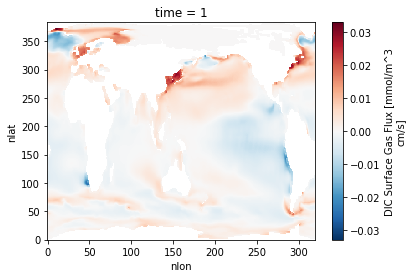

In [14]:
ds.FG_CO2.isel(time=0).plot()

In [21]:
importlib.reload(P)
co = P.process_data_source(analysis_name='ann-rgn',
                           experiment='ctrl_ocean-ice-core',
                           variable='FG_CO2', clobber=True)
co

INFO:root:Applying operator: <function make_regional_timeseries at 0x2aab142c3840>
INFO:root:Applying operator: <function compute_ann_climatology at 0x2aaafabc4840>
INFO:root:writing /glade/scratch/mclong/calcs/cmip6_cesm/processed_collections/ctrl_ocean-ice-core.000.ann-rgn.FG_CO2.zarr


ctrl_ocean-ice-core.000.ann-rgn.FG_CO2

In [22]:
ds = co.load()

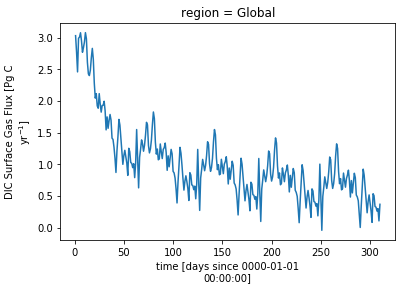

In [23]:
ds.FG_CO2.isel(region=0).plot()